In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

17464789/17464789 [==============================] - 24s 1us/step


In [12]:
len(test_labels)

25000

In [13]:
word_index = imdb.get_word_index() 
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 


1641221/1641221 [==============================] - 2s 1us/step


In [16]:
len(reverse_word_index)

88584

In [20]:
decoded_review = " ".join(
 [reverse_word_index.get(i-3, "?") for i in train_data[0]]) 

In [47]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.       
    return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [46]:
x_train

array([[ 0.,  1.,  6., ...,  0.,  0.,  0.],
       [ 0.,  1.,  7., ...,  0.,  0.,  0.],
       [ 0.,  1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 14., ...,  0.,  0.,  0.],
       [ 0.,  1.,  5., ...,  0.,  0.,  0.],
       [ 0.,  1., 12., ...,  0.,  0.,  0.]])

In [48]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [50]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [62]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [63]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [64]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 81ms/step - loss: 0.5696 - accuracy: 0.7729 - val_loss: 0.4520 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3773 - accuracy: 0.8815 - val_loss: 0.3540 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2850 - accuracy: 0.9051 - val_loss: 0.3013 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2308 - accuracy: 0.9209 - val_loss: 0.2821 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1957 - accuracy: 0.9317 - val_loss: 0.2758 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1675 - accuracy: 0.9450 - val_loss: 0.2779 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1464 - accuracy: 0.9523 - val_loss: 0.2860 - val_accuracy: 0.8832
Epoch 8/20
30

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

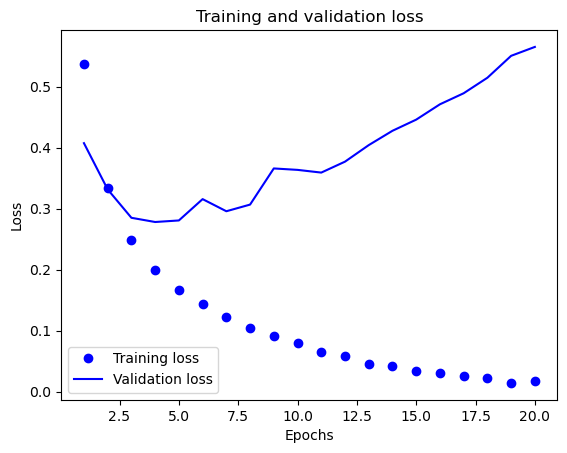

In [56]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

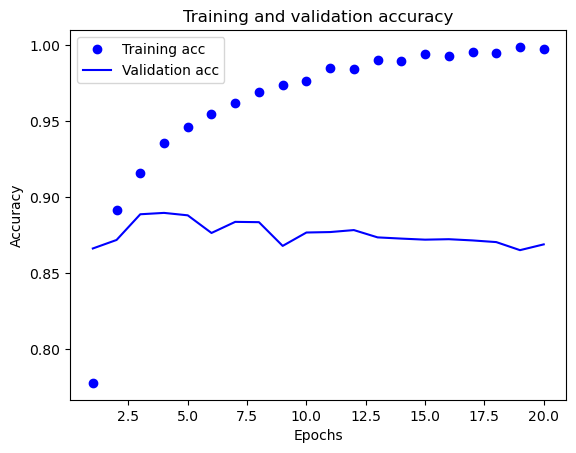

In [57]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
model1 = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model1.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=4, batch_size=512)
results = model1.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4770 - accuracy: 0.8089
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2797 - accuracy: 0.9040
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2164 - accuracy: 0.9208
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2838 - accuracy: 0.8846


In [68]:
model1.predict(x_test)>0.5

782/782 [==============================] - 2s 3ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Create the TextVectorization layer
text_vectorization = TextVectorization(output_mode="int", standardize="lower_and_strip_punctuation", max_tokens=1000)

# Example dataset
dataset = [
    "The quick brown fox jumps over the lazy dog!",
    "THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG."
]

# Adapt the TextVectorization layer to the dataset
text_vectorization.adapt(dataset)

# Transform a sentence using the TextVectorization layer
input_sentence = "The brown fox jumps"
encoded_sentence = text_vectorization(input_sentence)
print("Encoded Sentence:", encoded_sentence)


Encoded Sentence: tf.Tensor([2 9 7 6], shape=(4,), dtype=int64)


In [9]:
input_sentence = "The quick brown fox jumps over the lzy dog!"
encoded_sentence = text_vectorization(input_sentence)
print("Encoded Sentence:", encoded_sentence)


Encoded Sentence: tf.Tensor([2 3 9 7 6 4 2 5 8], shape=(9,), dtype=int64)
